✅ Dataset loaded successfully!
📌 First rows of the dataset:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa



📌 Dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

📌 Descriptive statistics:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000  

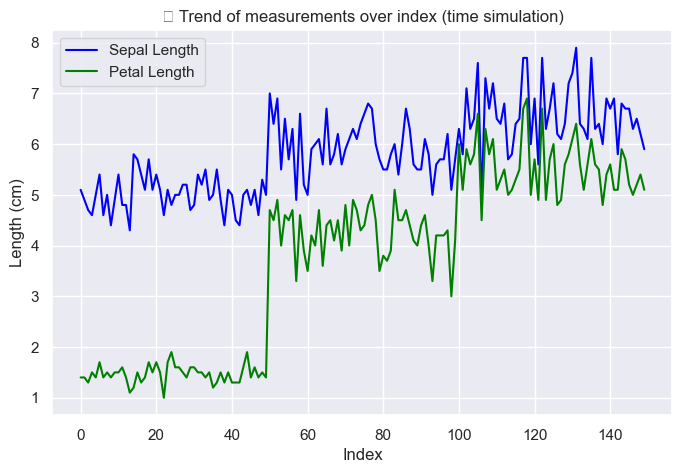

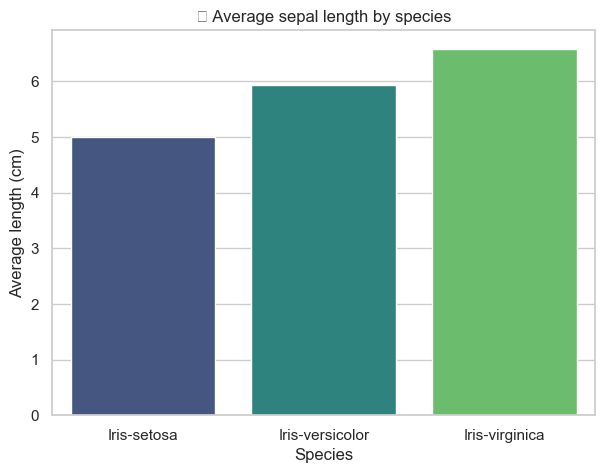

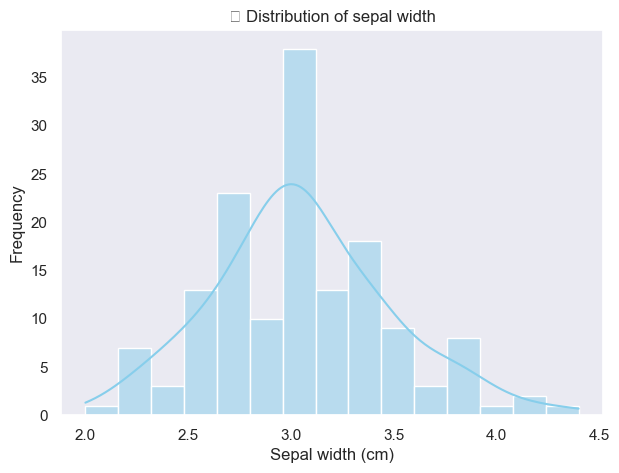

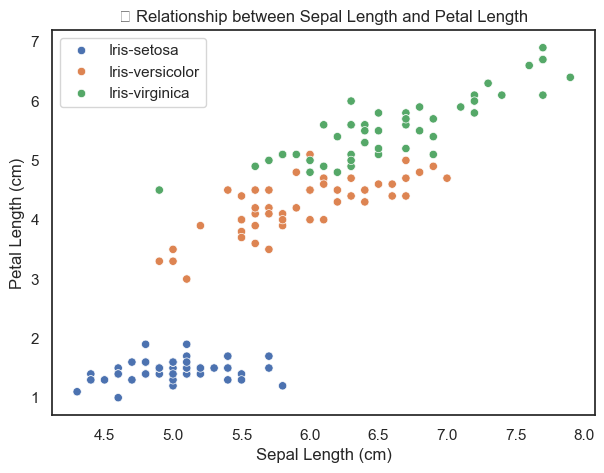

In [9]:
# ====================================================================
# Data Analysis Assignment with Pandas, Matplotlib and Seaborn
# ====================================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline in Jupyter
#%matplotlib inline  

# Set seaborn style
#sns.set_theme(style="whitegrid", palette="muted")
sns.set_theme(style="dark")        # fundo cinza-escuro, mais elegante


# ====================================================================
# Task 1: Load and Explore Dataset
# ====================================================================
try:
    df = pd.read_csv("Iris.csv")
    print("✅ Dataset loaded successfully!")
except FileNotFoundError:
    print("❌ Error: File not found. Please check the filename or path.")
    df = None
except pd.errors.ParserError:
    print("❌ Error: Could not parse CSV file. Please check the format.")
    df = None

if df is not None:
    # ==============================
    # Initial exploration
    # ==============================
    print("📌 First rows of the dataset:")
    display(df.head())

    print("\n📌 Dataset structure:")
    print(df.info())

    print("\n📌 Descriptive statistics:")
    print(df.describe())

    print("\n📌 Missing values per column:")
    print(df.isnull().sum())

    # Data cleaning (if necessary)
    df = df.dropna()

    # ====================================================================
	# Task 2: Basic Data Analysis
	# ====================================================================
    print("📌 Basic statistics of numerical columns:")
    print(df.describe())

    print("\n📌 Median of numerical columns:")
    print(df.median(numeric_only=True))

    print("\n📌 Standard deviation of numerical columns:")
    print(df.std(numeric_only=True))

    print("\n📌 Mean measurements by species:")
    print(df.groupby("Species").mean(numeric_only=True))

    
	# ====================================================================
    # Task 3: Data Visualization
	# ====================================================================

    # -- Line plot
    sns.set_theme(style="darkgrid", palette="deep")
    plt.figure(figsize=(8,5))
    sns.lineplot(x=df.index, y="SepalLengthCm", data=df, label="Sepal Length", color="blue")
    sns.lineplot(x=df.index, y="PetalLengthCm", data=df, label="Petal Length", color="green")
    plt.title("📈 Trend of measurements over index (time simulation)")
    plt.xlabel("Index")
    plt.ylabel("Length (cm)")
    plt.legend()
    plt.show()

    # -- Bar plot
    sns.set_theme(style="whitegrid", palette="pastel")
    plt.figure(figsize=(7,5))
    mean_petal = df.groupby("Species")["SepalLengthCm"].mean().reset_index()
    sns.barplot(x="Species", y="SepalLengthCm", data=mean_petal, palette="viridis")
    plt.title("📊 Average sepal length by species")
    plt.xlabel("Species")
    plt.ylabel("Average length (cm)")
    plt.show()

    # -- Histogram
    sns.set_theme(style="dark", palette="bright")
    plt.figure(figsize=(7,5))
    sns.histplot(df["SepalWidthCm"], bins=15, kde=True, color="skyblue")
    plt.title("📉 Distribution of sepal width")
    plt.xlabel("Sepal width (cm)")
    plt.ylabel("Frequency")
    plt.show()

    # -- Scatter plot
    sns.set_theme(style="white", palette="colorblind")
    plt.figure(figsize=(7,5))
    sns.scatterplot(x="SepalLengthCm", y="PetalLengthCm", hue="Species", data=df, palette="deep")
    plt.title("🔍 Relationship between Sepal Length and Petal Length")
    plt.xlabel("Sepal Length (cm)")
    plt.ylabel("Petal Length (cm)")
    plt.legend()
    plt.show()
